In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd

array(['basal', 'HER', 'cell_line', 'normal', 'luminal_A', 'luminal_B'],
      dtype=object)

In [39]:
raw_data = pd.read_csv("Breast_GSE45827.csv")
metadata = raw_data[['samples', 'type']]
color_map = {
    'healthy': 'green',   # Replace 'Type1' with your actual type names
    'basal': 'purple',  # Replace 'Type2' with your actual type names
    'luminal_A': 'yellow',
    'luminal_B': 'cyan',
    'HER': 'blue',
    'cell_line': 'orange'
}

# Add a 'color' column based on the 'type' column
metadata['type'] = metadata['type'].map(lambda x: 'healthy' if x == 'normal' else x)
metadata['color'] = metadata['type'].map(color_map)


C:\Users\itani\AppData\Local\Temp\ipykernel_38072\586194737.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['type'] = metadata['type'].map(lambda x: 'healthy' if x == 'normal' else x)
C:\Users\itani\AppData\Local\Temp\ipykernel_38072\586194737.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['color'] = metadata['type'].map(color_map)


C:\Users\itani\AppData\Local\Temp\ipykernel_38072\485812125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['type'] = metadata['type'].map(lambda x: 'healthy' if x == 'normal' else x)


In [28]:
metadata
raw_data.drop(['samples', 'type'], axis = 1, inplace = True)

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
kmeans.fit(raw_data)


C:\Users\itani\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [35]:
centroids = kmeans.cluster_centers_
data_for_pca = raw_data
data_for_pca.columns = range(data_for_pca.shape[1])
data_with_centroids = pd.concat([data_for_pca,pd.DataFrame(centroids)],axis = 0)

In [36]:
data_with_centroids

,0,1,2,3,4,5,6,7,8,9,...,54665,54666,54667,54668,54669,54670,54671,54672,54673,54674
0,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,3.278896,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,3.589636,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,3.552253,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,3.312473,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,3.368243,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,10.021784,7.993230,6.488400,7.272254,3.188358,7.158926,5.187362,4.698418,8.520414,3.639424,...,12.238164,11.701917,13.797752,13.521129,6.897341,5.217120,5.456402,2.894472,3.600847,3.133341
2,10.219646,6.428852,5.527662,7.587111,3.322261,8.135556,5.758591,4.578178,7.615436,3.770717,...,13.237785,12.811179,14.495650,14.342022,9.338737,5.328691,6.631454,2.894163,3.522526,3.191712
3,10.351633,7.724679,6.254779,7.274285,3.216406,7.147975,5.365909,4.717997,7.882329,3.689836,...,12.234832,11.706586,13.812818,13.538854,6.925349,5.246193,5.522421,2.886088,3.602912,3.173706
4,9.904857,8.808437,5.286330,7.584341,3.239354,6.533271,5.176932,5.055129,6.057817,3.847932,...,11.966830,11.342226,13.974987,13.708715,8.038253,6.453257,6.883349,3.049190,3.843252,3.265455


In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_with_centroids)
pca = PCA(n_components=2)  # You can choose the number of components you want
pca_result = pca.fit_transform(scaled_data)

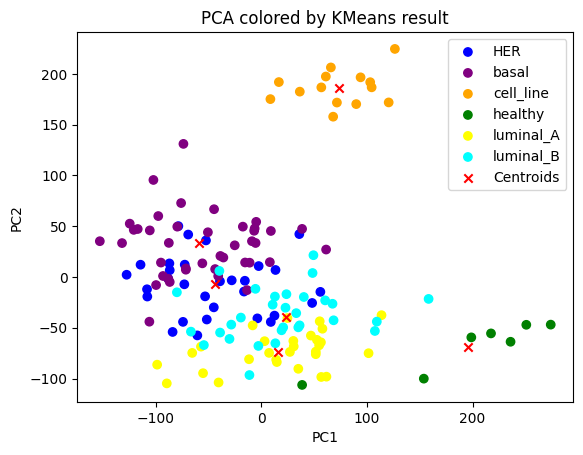

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you already have `metadata` and `pca_result` defined, and that `metadata['color']`
# has been set according to `type` (i.e., 'normal', 'disease', etc.)

# Create the PCA scatter plot for the samples
pca_df = pd.DataFrame(pca_result[:-6], columns=['PC1', 'PC2'])

# Create a scatter plot for each unique type
unique_types = np.unique(metadata['type'])
for t in unique_types:
    # Get the indices of the samples belonging to the current type
    type_indices = metadata[metadata['type'] == t].index
    # Plot only the samples that belong to this type
    plt.scatter(pca_df.loc[type_indices, 'PC1'], pca_df.loc[type_indices, 'PC2'],
                c=metadata.loc[type_indices, 'color'], label=t)

# Plot the centroids with red 'x' markers
centroids_Df = pd.DataFrame(pca_result[-6:], columns=['PC1', 'PC2'])
plt.scatter(centroids_Df['PC1'], centroids_Df['PC2'], c='red', marker='x', label='Centroids')

# Set the labels for the axes and the title
plt.title('PCA colored by KMeans result')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Add a legend that shows the types with the corresponding colors
plt.legend(loc='upper right')

# Show the plot
plt.show()


In [42]:
metadata['kmeans_label'] = kmeans.labels_

C:\Users\itani\AppData\Local\Temp\ipykernel_38072\1349196591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['kmeans_label'] = kmeans.labels_


In [41]:
metadata

,samples,type,color,kmean_label
0,84,basal,purple,1
1,85,basal,purple,1
2,87,basal,purple,1
3,90,basal,purple,1
4,91,basal,purple,1
...,...,...,...,...
146,230,luminal_B,cyan,5
147,233,luminal_B,cyan,5
148,236,luminal_B,cyan,5
149,237,luminal_B,cyan,5


In [51]:
for type in np.unique(metadata['type']):
    import matplotlib.pyplot as plt
import numpy as np

# Define a fixed set of colors for each cluster (assuming you have 2 clusters)
cluster_colors = cluster_colors = {
    0: 'lightblue',  # Cluster 0
    1: 'salmon',     # Cluster 1
    2: 'lightgreen', # Cluster 2
    3: 'orange',     # Cluster 3
    4: 'purple',     # Cluster 4
    5: 'yellow',     # Cluster 5
}  # Update this based on the number of clusters

# Loop through each unique 'type'
for type in np.unique(metadata['type']):
    # Select the subset of data for this type
    cluster_data = metadata[metadata['type'] == type]

    # Count the occurrences of each KMeans cluster label within this type
    cluster_counts = cluster_data['kmeans_label'].value_counts()

    # Map the cluster labels to their corresponding colors
    colors = [cluster_colors[label] for label in cluster_counts.index]

    pie_chart_labels = [f"Cluster {cluster}" for cluster in cluster_counts.index]
    # Create a pie chart for the distribution of KMeans clusters
    plt.pie(cluster_counts, labels=pie_chart_labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f"Cluster Distribution for {type}")

    plt.savefig(f"./pie_charts/pie_chart_{type}.png")

    # Clear the figure to avoid overlap between charts
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Loop through each unique KMeans cluster (assuming kmeans_label column exists)
for cluster_label in np.unique(metadata['kmeans_label']):
    # Select the subset of data for this cluster
    cluster_data = metadata[metadata['kmeans_label'] == cluster_label]

    # Count the occurrences of each 'type' within the current cluster
    type_counts = cluster_data['type'].value_counts()

    # Create a pie chart for the distribution of 'type' within this cluster
    plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Cluster {cluster_label} - Type Distribution")

    # Save the pie chart as a PNG file
    plt.savefig(f"pie_chart_cluster_{cluster_label}.png")
    # Clear the figure to avoid overlap between charts
    plt.clf()


<Figure size 640x480 with 0 Axes>